In [10]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.discrete.discrete_model import Probit
from scipy.stats import norm

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/marriage_data.csv"
df = pd.read_csv(url)
df.head()

,id,male,age,partner,undergrad,grad
0,2,1,48,1,1,0
1,3,1,47,1,1,0
2,4,1,58,1,1,0
3,5,0,29,1,0,0
4,6,0,35,0,0,0


## 12.1.1節の推定結果(50歳以下の男性に限定した分析)

### 線形確率


In [3]:
df_male = df[(df['male'] == 1) & (df['age'] <= 50)]
X = sm.add_constant(df_male['age'])
y = df_male['partner']
male_lm = sm.OLS(y, X).fit()
print(male_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                partner   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1080.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          1.51e-178
Time:                        16:02:20   Log-Likelihood:                -671.00
No. Observations:                1491   AIC:                             1346.
Df Residuals:                    1489   BIC:                             1357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5310      0.034    -15.608      0.0

### 予測

In [53]:
def predict_prob(age):
    predict_value = male_lm.params['const'] + male_lm.params['age'] * (age)
    return predict_value

print(f"Prediction for age 25: {predict_prob(25):.3f}")
print(f"Prediction for age 50: {predict_prob(50):.3f}")

Prediction for age 25: 0.247
Prediction for age 50: 1.020


## 12.1.2節の推定結果(50歳以下の男性に限定した分析)

### プロビットモデル


In [12]:
male_probit = Probit(y, X).fit()
print(male_probit.summary())

Optimization terminated successfully.
         Current function value: 0.444347
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                partner   No. Observations:                 1491
Model:                         Probit   Df Residuals:                     1489
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.3561
Time:                        16:04:19   Log-Likelihood:                -662.52
converged:                       True   LL-Null:                       -1028.9
Covariance Type:            nonrobust   LLR p-value:                2.280e-161
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4919      0.163    -21.377      0.000      -3.812      -3.172
age            0.1066      0.

In [54]:
def predict_prob(age):
    z = male_probit.params['const'] + male_probit.params['age'] * age
    return norm.cdf(z)

print(f"Predicted probability for age 25: {predict_prob(25):.3f}")
print(f"Predicted probability for age 50: {predict_prob(50):.3f}")

Predicted probability for age 25: 0.181
Predicted probability for age 50: 0.956


## 12.1.3節の図

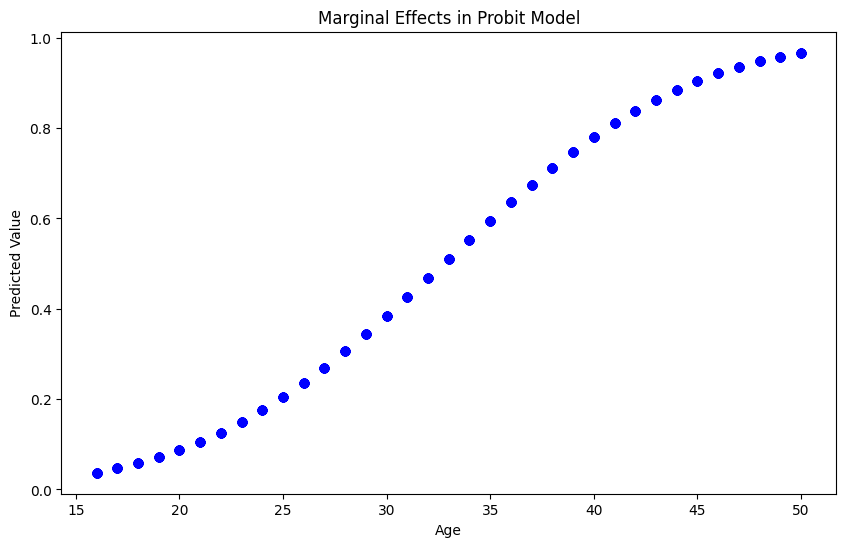

In [14]:
df2 = df[(df['age'] <= 50) & (df['male'] == 1)]
df2['p_partner'] = male_probit.predict(sm.add_constant(df2['age']))

plt.figure(figsize=(10, 6))
plt.scatter(df2['age'], df2['p_partner'], color='blue', marker='o')
plt.title("Marginal Effects in Probit Model")
plt.xlabel("Age")
plt.ylabel("Predicted Value")
plt.show()

## 12.1.3節の推定結果(50歳以下の男性に限定した分析)

### 線形確率

In [16]:
X = sm.add_constant(df_male[['age', 'undergrad', 'grad']])
male_lm = sm.OLS(y, X).fit(cov_type='HC0')
print(male_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                partner   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     683.5
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          3.27e-279
Time:                        16:05:34   Log-Likelihood:                -662.51
No. Observations:                1491   AIC:                             1333.
Df Residuals:                    1487   BIC:                             1354.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5259      0.025    -21.060      0.0

### プロビットモデル

In [18]:
male_probit = Probit(y, X).fit(cov_type='HC0')
print(male_probit.summary())

Optimization terminated successfully.
         Current function value: 0.438403
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                partner   No. Observations:                 1491
Model:                         Probit   Df Residuals:                     1487
Method:                           MLE   Df Model:                            3
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.3647
Time:                        16:05:51   Log-Likelihood:                -653.66
converged:                       True   LL-Null:                       -1028.9
Covariance Type:                  HC0   LLR p-value:                2.402e-162
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5275      0.159    -22.135      0.000      -3.840      -3.215
age            0.1046      0.

### プロビットモデルの限界効果

In [21]:
margeff = male_probit.get_margeff()
print(margeff.summary())

       Probit Marginal Effects       
Dep. Variable:                partner
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0257      0.000     57.116      0.000       0.025       0.027
undergrad      0.0631      0.022      2.922      0.003       0.021       0.105
grad           0.1631      0.041      3.956      0.000       0.082       0.244


## 12.1.3節の推定結果(50歳以下の女性に限定した分析)

In [23]:
df_female = df[(df['male'] == 0) & (df['age'] <= 50)]
X = sm.add_constant(df_female[['age', 'undergrad', 'grad']])
y = df_female['partner']

### 線形確率

In [24]:
female_lm = sm.OLS(y, X).fit(cov_type='HC0')
print(female_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                partner   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     449.7
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          6.89e-217
Time:                        16:06:53   Log-Likelihood:                -910.38
No. Observations:                1765   AIC:                             1829.
Df Residuals:                    1761   BIC:                             1851.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3851      0.027    -14.260      0.0

### プロビットモデル

In [27]:
female_probit = Probit(y, X).fit(cov_type='HC0')
print(female_probit.summary())

Optimization terminated successfully.
         Current function value: 0.499138
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                partner   No. Observations:                 1765
Model:                         Probit   Df Residuals:                     1761
Method:                           MLE   Df Model:                            3
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.2603
Time:                        16:07:11   Log-Likelihood:                -880.98
converged:                       True   LL-Null:                       -1191.0
Covariance Type:                  HC0   LLR p-value:                4.402e-134
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7933      0.127    -21.989      0.000      -3.042      -2.544
age            0.0883      0.

### プロビットモデルの限界効果

In [28]:
margeff = female_probit.get_margeff()
print(margeff.summary())

       Probit Marginal Effects       
Dep. Variable:                partner
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0249      0.001     49.653      0.000       0.024       0.026
undergrad      0.0227      0.024      0.954      0.340      -0.024       0.069
grad           0.1173      0.086      1.362      0.173      -0.051       0.286


## 練習問題の推定結果(50歳以下の男性)


In [32]:
df_male = df[(df['male'] == 1) & (df['age'] <= 50)]

### プロビットモデル

In [36]:
X = sm.add_constant(df_male[['age', 'undergrad', 'grad']])
y = df_male['partner']
probit_model = Probit(y, X)
probit_results = probit_model.fit(cov_type='HC0')

print(probit_results.summary())

Optimization terminated successfully.
         Current function value: 0.438403
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                partner   No. Observations:                 1491
Model:                         Probit   Df Residuals:                     1487
Method:                           MLE   Df Model:                            3
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.3647
Time:                        16:10:27   Log-Likelihood:                -653.66
converged:                       True   LL-Null:                       -1028.9
Covariance Type:                  HC0   LLR p-value:                2.402e-162
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5275      0.159    -22.135      0.000      -3.840      -3.215
age            0.1046      0.

### 図

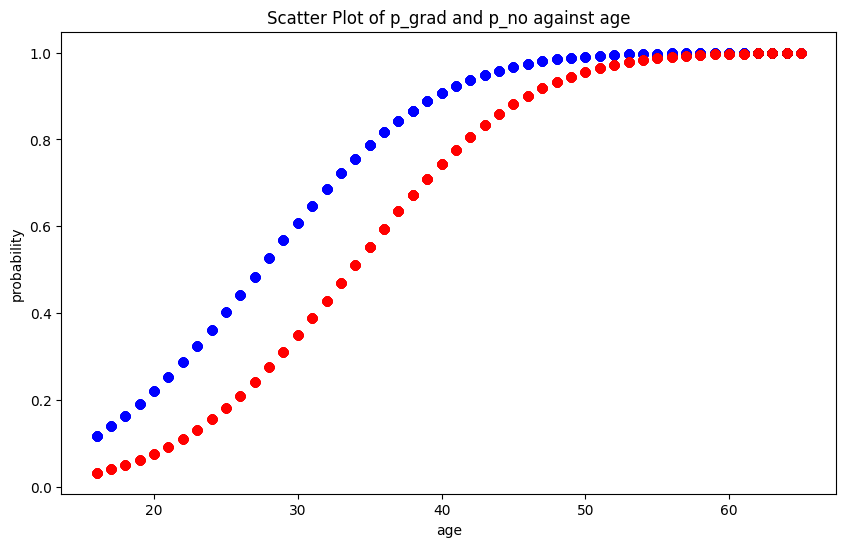

In [40]:
coefficients = probit_results.params

# Calculate p_grad and p_no
p_grad = norm.cdf(coefficients['const'] + coefficients['age'] * df['age'] + coefficients['grad'])
p_no = norm.cdf(coefficients['const'] + coefficients['age'] * df['age'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], p_grad, color='blue', label='p_grad')
plt.scatter(df['age'], p_no, color='red', label='p_no')

plt.xlabel('age')
plt.ylabel('probability')
plt.title('Scatter Plot of p_grad and p_no against age')

plt.show()